# Making models with Bagpipes

This example will show you how to make a model galaxy spectrum. The two main steps in this process are defining the physical parameters of the galaxy you would like to model, and defining the observables (spectroscopy and/or photometry) you would like to obtain predictions for.

You'll need to understand the syntax used here before moving on to fitting observational data. For further information see the [making model galaxies](http://bagpipes.readthedocs.io/en/latest/model_galaxies.html) page of the documentation.

## The model_components dictionary

Instructions about what kind of model to make are passed to the code via the [model components dictionary](https://bagpipes.readthedocs.io/en/latest/model_components.html). Each "component" is a sub-dictionary containing information about either the star-formation history, the dust model or the nebular emission model. A number of global properties can also be specified. The only required components are the observed redshift, and at least one star formation history component.

A simple tau model with Calzetti dust can be set up as follows.

In [1]:
import bagpipes as pipes
import numpy as np

exp = {}                          # Tau model star formation history component
exp["age"] = 3.                   # Gyr
exp["tau"] = 0.75                 # Gyr
exp["massformed"] = 9.            # log_10(M*/M_solar)
exp["metallicity"] = 0.5          # Z/Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # magnitudes

model_components = {}                   # The model components dictionary
model_components["redshift"] = 1.0      # Observed redshift  
model_components["exponential"] = exp   
model_components["dust"] = dust

## Defining filter curves

If you would like to obtain predictions for photometric fluxes which would be observed for an object with the parameters listed above, you'll first need to define a list of filter curves, or filt_list, for the code to calculate photometric fluxes through.

A filt_list simply contains paths from the current working directory (or absolute paths) to the locations the filter curve files are stored. Filter curve files should start with a column of wavelengths in Angstroms, followed by a column of relative transmission values.

Through these examples we'll stick with the [CANDELS GOODS South catalogue](https://archive.stsci.edu/prepds/candels/) of Guo et al. (2013). The filters are as follows.

In [2]:
goodss_filt_list = ["filters/VIMOS_U",
                    "filters/f435w",
                    "filters/f606w",
                    "filters/f775w",
                    "filters/f850lp",
                    "filters/f098m",
                    "filters/f105w",
                    "filters/f125w",
                    "filters/f160w",
                    "filters/ISAAC_Ks",
                    "filters/HAWKI_K",
                    "filters/IRAC1",
                    "filters/IRAC2",
                    "filters/IRAC3",
                    "filters/IRAC4"]

I usually find it more convenient to store these in a text file and load them up as an array:

In [3]:
goodss_filt_list = np.loadtxt("filters/goodss_filt_list.txt", dtype="str")

## Making the model

We're now ready to make our model galaxy. The command is:

In [4]:
model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list)

We can generate a quick plot to see what the model spectrum and star-formation history look like with:

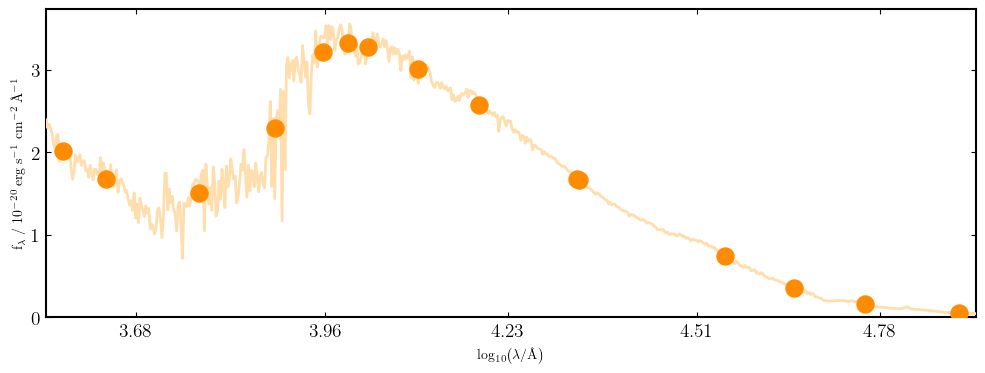

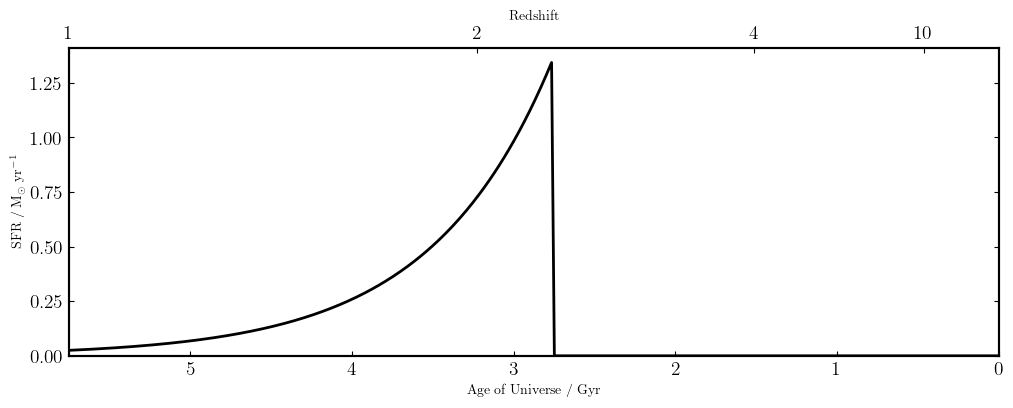

array([2.01612254e-20, 1.67331690e-20, 1.50097640e-20, 2.29024134e-20,
       3.20846447e-20, 3.31660726e-20, 3.27816097e-20, 3.00174502e-20,
       2.57203011e-20, 1.66069955e-20, 1.68084274e-20, 7.46145445e-21,
       3.56245627e-21, 1.56601805e-21, 5.64002054e-22])

In [5]:
fig = model.plot()
fig = model.sfh.plot()
model.photometry

## Model spectroscopy

We can generate an output spectroscopic observation by passing an array of wavelengths in Angstroms to model_galaxy as the spec_wavs keyword argument:

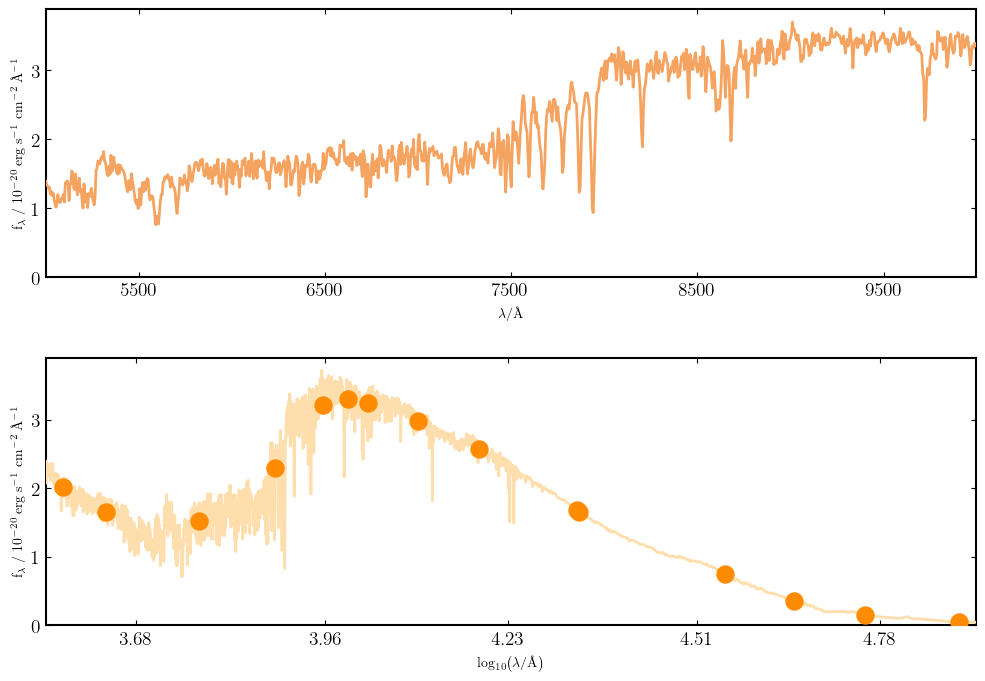

In [7]:
model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=np.arange(5000., 10000., 5.))

fig = model.plot()

## Updating model parameters

The parameters of a model can be updated to change the output model observables. This  is computationally much faster than making a new model, and is achieved using the update method. We can change numerical values in model_components and pass it to the update method to change the model spectrum.

The update method does not support adding or removing components, e.g. adding nebular emission, or changing non-numerical values e.g. the type of dust.

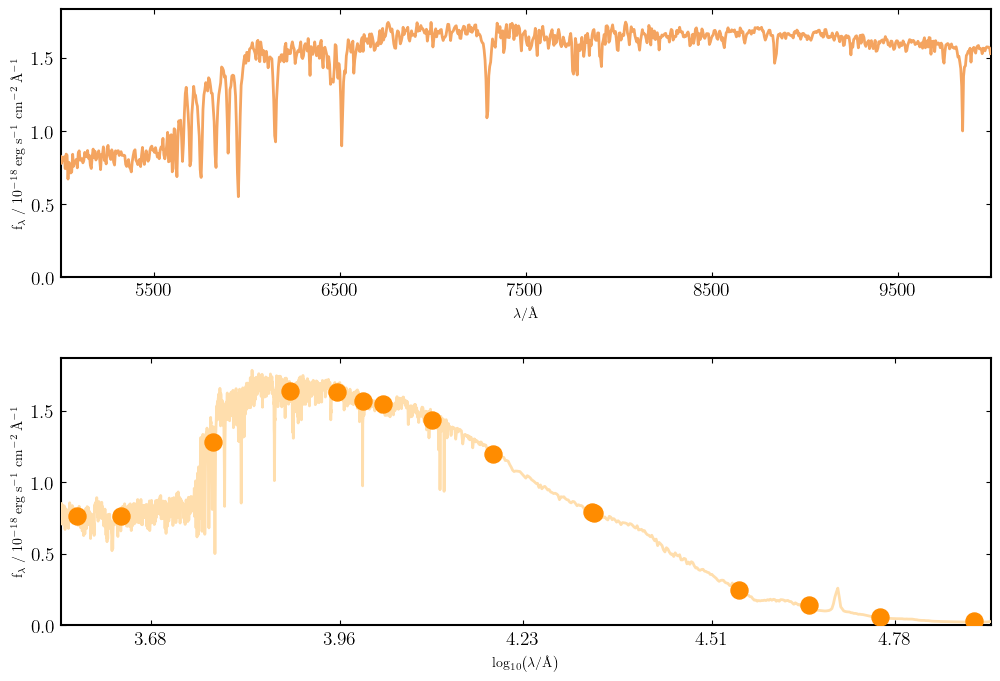

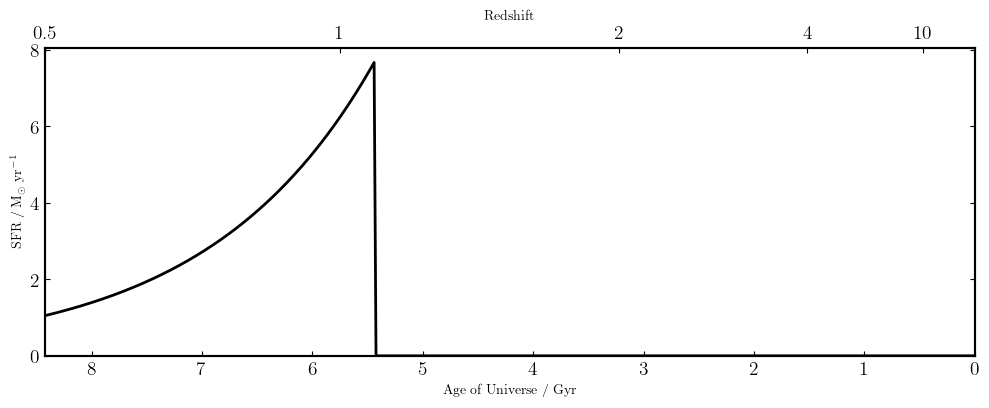

In [8]:
exp["massformed"] = 10.           
exp["tau"] = 1.5
dust["Av"] = 1.0
model_components["redshift"] = 0.5

model.update(model_components)
fig = model.plot()
fig = model.sfh.plot()

## Adding complexity to the model - nebular emission

Now we can make the model a little more interesting. Let's add nebular emission and velocity dispersion.

Note that because we're adding a new component we need to re-generate a new model rather than using the update method, which is only designed to update numerical parameter values.

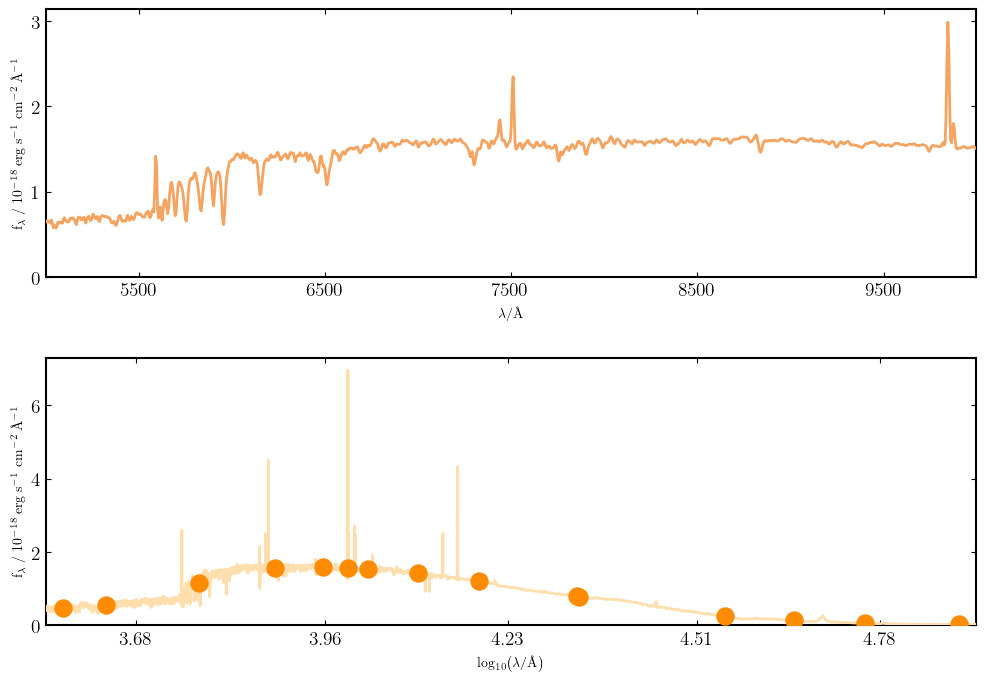

In [9]:
nebular = {}                      # Nebular emission component
nebular["logU"] = -3.             # log_10(ionization parameter)

dust["eta"] = 3.                  # Extra dust for young stars: multiplies Av

model_components["t_bc"] = 0.01         # Lifetime of birth clouds (Gyr)
model_components["veldisp"] = 200.      # km/s
model_components["nebular"] = nebular


model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=np.arange(5000., 10000., 5.))

fig = model.plot()

## Adding complexity to the model - star-formation histories

Let's try out a more interesting star-formation history. We'll try a double-power-law and some bursts. Multiple components of the same type can be distinguished by numbering each component:

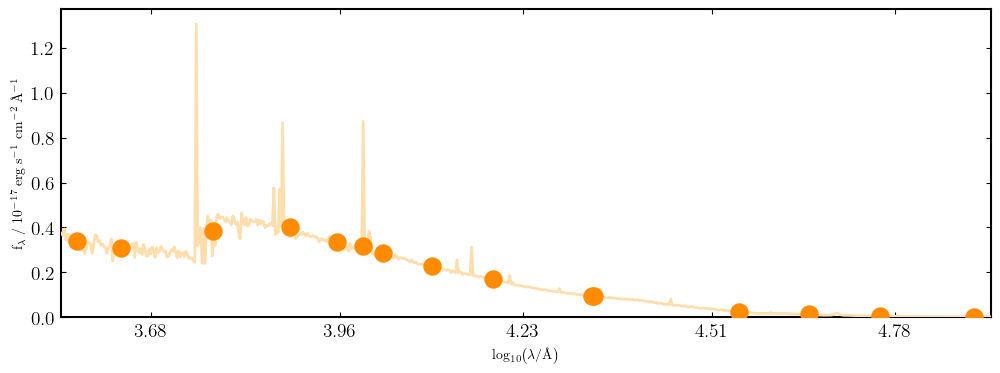

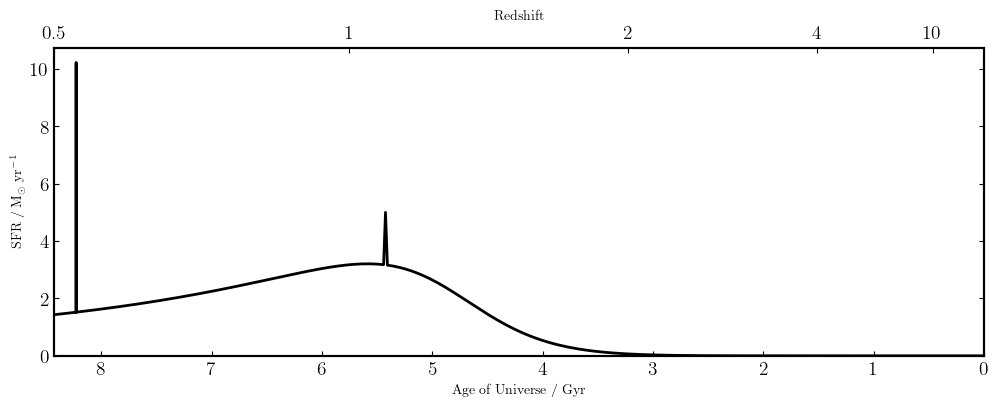

In [6]:
dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

dblplaw = {}
dblplaw["tau"] = 5.
dblplaw["alpha"] = 2.5
dblplaw["beta"] = 10.
dblplaw["massformed"] = 10.
dblplaw["metallicity"] = 0.5

burst1 = {}
burst1["age"] = 0.2
burst1["massformed"] = 7.
burst1["metallicity"] = 1.

burst2 = {}
burst2["age"] = 3.
burst2["massformed"] = 7.5
burst2["metallicity"] = 0.2

model_components = {}                   
model_components["redshift"] = 0.5
model_components["t_bc"] = 0.01         
model_components["veldisp"] = 200. 
model_components["burst1"] = burst1
model_components["burst2"] = burst2
model_components["dblplaw"] = dblplaw
model_components["dust"] = dust
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list)

fig = model.plot()
sfh = model.sfh.plot()

Finally, let's try out a custom star-formation history. You can pass a numpy array containing a column of ages in years and a column of star-formation rates in Solar masses per year:

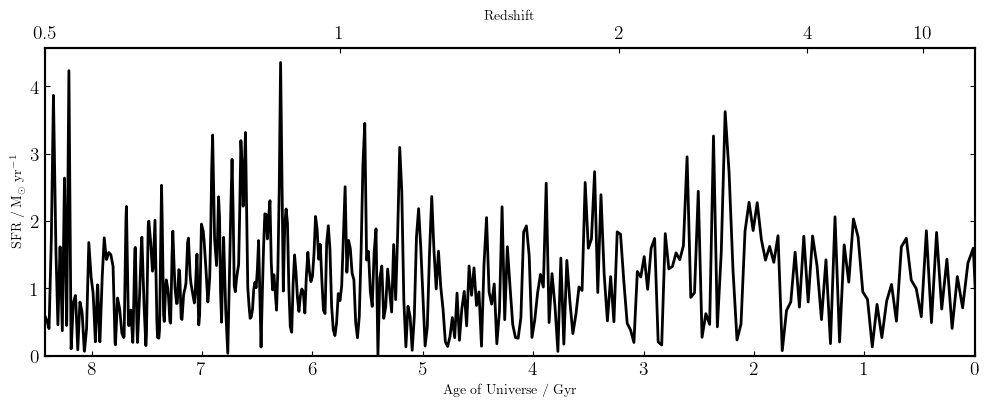

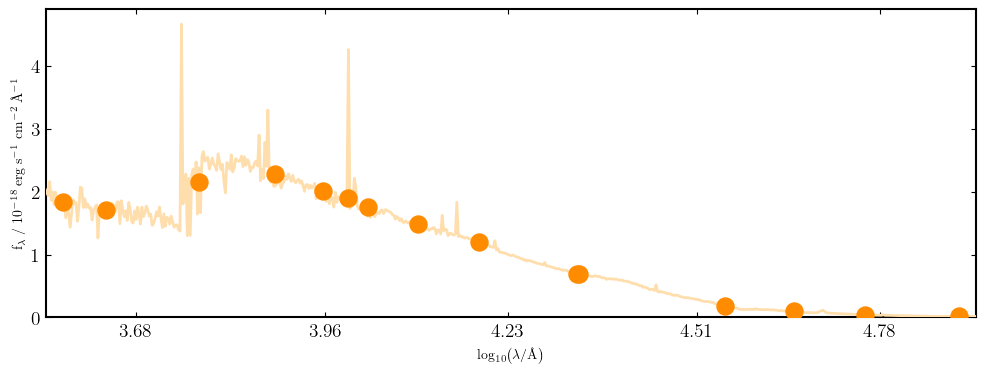

In [7]:
dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

sfh = np.zeros((500, 2)) 
sfh[:, 0] = np.arange(0., 10., 0.02)*10**9 # first column is from 0 to 10 billion yrs by steps pf 0.02
sfh[:, 1] = np.abs(np.random.randn(500)) # random number- gaussian

custom = {}
custom["history"] = sfh
custom["massformed"] = 10.
custom["metallicity"] = 1.

model_components = {}                   
model_components["redshift"] = 0.5
model_components["t_bc"] = 0.01         
model_components["veldisp"] = 200. 
model_components["custom"] = custom
model_components["dust"] = dust
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list)

sfh = model.sfh.plot()
fig = model.plot()

## Plotting the full spectrum

As well as the spectroscopic or photometric observables requested from model_galaxy, the code retains an internal model for the spectrum over the full range of rest-frame wavelengths between 1 and 10^8 Angstroms. This model is stored in model_galaxy.spectrum_full, and the corresponding rest-frame wavelengths in model_galaxy.wavelengths. This full spectrum can be plotted with:

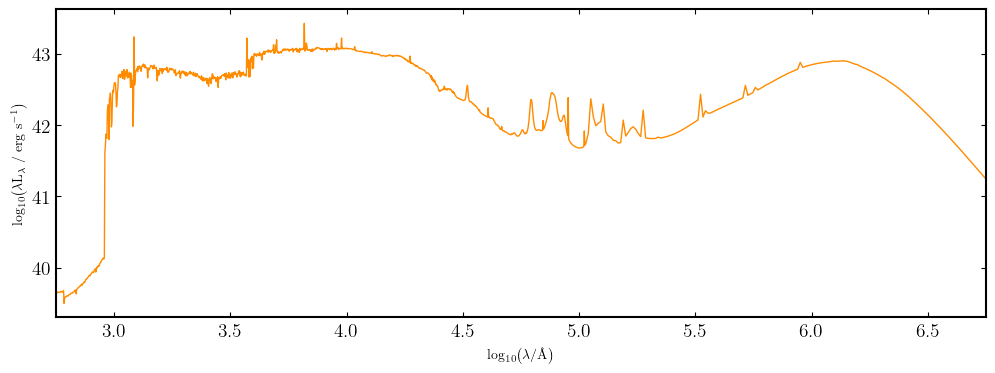

In [8]:
model.plot_full_spectrum()